In [25]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr


ModuleNotFoundError: No module named 'statsmodels'

Importing libraries necessary for the exploratory data analysis


Loading the dataset

In [2]:
#Importing the dataset
df = pd.read_csv("weather_dataset/1. Weather Data.csv")
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [3]:
df.tail()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,12/31/2012 23:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [4]:
df.shape

(8784, 8)

The pandas dataframes used above; head(), tail(), and shape are used to show the fist 5 rows, the last 5 rows, the dimensios of the dataset respectively.
For eg, the dataset contains 8,784 rows and 8 columns.

In [5]:
#display the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [6]:
#checking for missing/ null values
missing_values = df.isnull().sum()
print("\
Missing values in each column:")
print(missing_values)

Missing values in each column:
Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64


In [7]:
#checking for any duplicates in the dataset
duplicate_records = df.duplicated().sum()
print("\
Number of duplicate records:", duplicate_records)

print("Done with data overview and cleaning.")

Number of duplicate records: 0
Done with data overview and cleaning.


From the above analysis; 1. checking for missing values
                          2. checking for duplicated records
The following observations were made;
1. No missing values were detected in the columns
2. There were no duplicate records

Next, lets get into the statistical analysis of the dataset, to understand the distribution of numerical features
Here, we will used the describe function. This summary provides insights into the mean, standard deviation, minimum, maximum, and quartiles for each numerical column.

In [9]:
# Generate a statistical summary of the dataset
statistical_summary = df.describe()
print(statistical_summary)

print("Done with statistical summary.")

            Temp_C  Dew Point Temp_C    Rel Hum_%  Wind Speed_km/h  \
count  8784.000000       8784.000000  8784.000000      8784.000000   
mean      8.798144          2.555294    67.431694        14.945469   
std      11.687883         10.883072    16.918881         8.688696   
min     -23.300000        -28.500000    18.000000         0.000000   
25%       0.100000         -5.900000    56.000000         9.000000   
50%       9.300000          3.300000    68.000000        13.000000   
75%      18.800000         11.800000    81.000000        20.000000   
max      33.000000         24.400000   100.000000        83.000000   

       Visibility_km    Press_kPa  
count    8784.000000  8784.000000  
mean       27.664447   101.051623  
std        12.622688     0.844005  
min         0.200000    97.520000  
25%        24.100000   100.560000  
50%        25.000000   101.070000  
75%        25.000000   101.590000  
max        48.300000   103.650000  
Done with statistical summary.


Next, let's create visualizations to show the distribution of key weather parameters such as temperature, humidity, and wind speed.

In [18]:
# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 20))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# List of parameters to visualize
params = ['Temp_C', 'Rel Hum_%', 'Wind Speed_km/h']
titles = ['Temperature (\u00b0C)', 'Relative Humidity (%)', 'Wind Speed (km/h)']
colors = ['#ff9999', '#66b3ff', '#99ff99']

for i, (param, title, color) in enumerate(zip(params, titles, colors)):
    # Histogram
    axes[i*2].hist(df[param], bins=30, color=color, edgecolor='black')
    axes[i*2].set_title(f'Distribution of {title}')
    axes[i*2].set_xlabel(title)
    axes[i*2].set_ylabel('Frequency')
     # Box plot
    axes[i*2+1].boxplot(df[param])
    axes[i*2+1].set_title(f'Box Plot of {title}')
    axes[i*2+1].set_ylabel(title)

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('weather_distributions.png')
plt.close()

print("Visualizations have been created and saved as 'weather_distributions.png'.")
# Display basic statistics
print("\
Basic statistics of the key parameters:")
print(df[params].describe())



Visualizations have been created and saved as 'weather_distributions.png'.
Basic statistics of the key parameters:
            Temp_C    Rel Hum_%  Wind Speed_km/h
count  8784.000000  8784.000000      8784.000000
mean      8.798144    67.431694        14.945469
std      11.687883    16.918881         8.688696
min     -23.300000    18.000000         0.000000
25%       0.100000    56.000000         9.000000
50%       9.300000    68.000000        13.000000
75%      18.800000    81.000000        20.000000
max      33.000000   100.000000        83.000000


The image("C:/Users\Joel/kaggle_datasets/weather_distributions.png") shows the distribution and box plots for Temperature (°C), Relative Humidity (%), and Wind Speed (km/h). Here's a brief summary of what we can observe:

1. Temperature (°C):
The distribution appears to be bimodal, which is typical for temperature data over a year.
The box plot shows a median temperature around 9.3°C, with a wide range from about -23.3°C to 33.0°C.

2. Relative Humidity (%):
The distribution is slightly left-skewed, with most values concentrated between 50% and 90%.
The box plot indicates a median humidity around 68%, with a range from 18% to 100%.

3. Wind Speed (km/h):
The distribution is right-skewed, with most wind speeds falling between 0 and 30 km/h.
The box plot shows a median wind speed of about 13 km/h, with some extreme values reaching up to 83 km/h.


The visualizations and statistics above provide a good overview of the weather conditions:

1. Temperatures vary widely throughout the year, with a mean of about 8.8°C.
2. Relative humidity is generally high, with a mean of 67.4% and often reaching 100%.
3. Wind speeds are typically moderate, with a mean of 14.9 km/h, but can occasionally be very high.

This analysis gives us a clear picture of the climate represented in the dataset, showing the variability in temperature, the tendency towards humid conditions, and the range of wind speeds experienced.

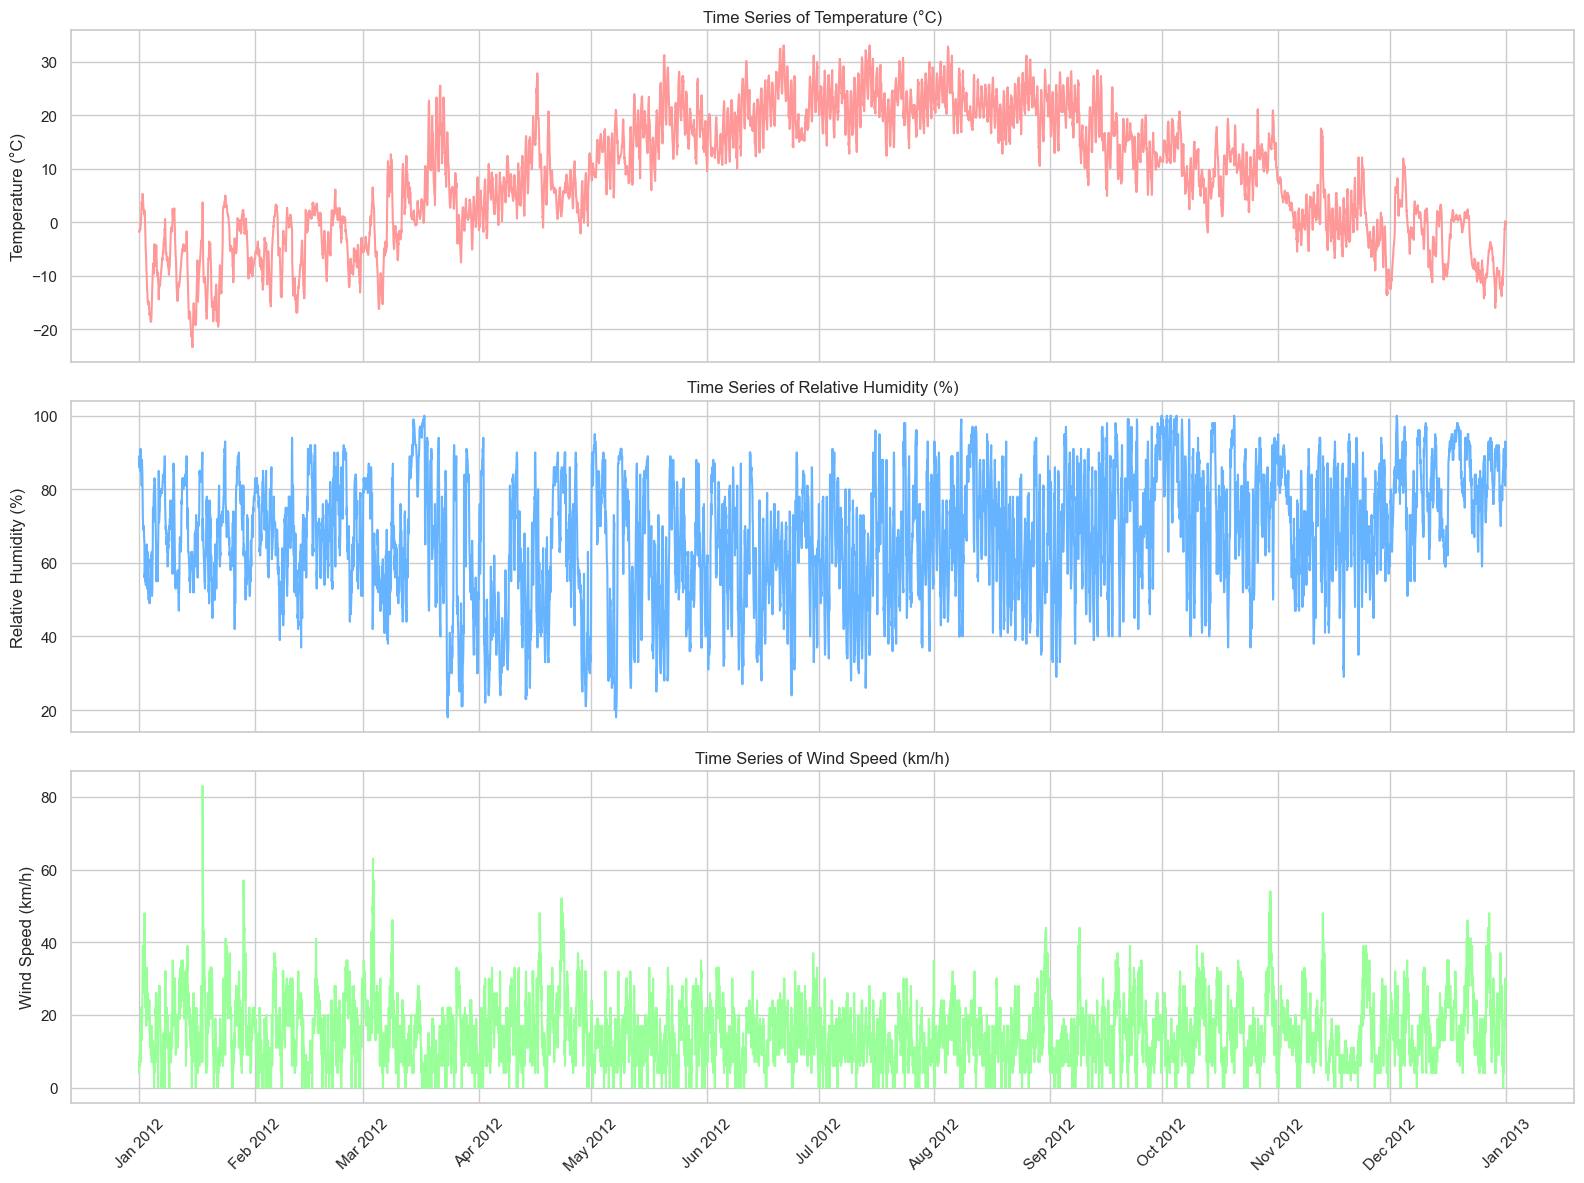

In [20]:
# Convert 'Date/Time' to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%m/%d/%Y %H:%M')

# Set 'Date/Time' as the index
df.set_index('Date/Time', inplace=True)

# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharex=True)

# Plot time series for each parameter
params = ['Temp_C', 'Rel Hum_%', 'Wind Speed_km/h']
titles = ['Temperature (°C)', 'Relative Humidity (%)', 'Wind Speed (km/h)']
colors = ['#ff9999', '#66b3ff', '#99ff99']
for i, (param, title, color) in enumerate(zip(params, titles, colors)):
    axes[i].plot(df.index, df[param], color=color)
    axes[i].set_title(f'Time Series of {title}')
    axes[i].set_ylabel(title)
    axes[i].grid(True)

# Set x-axis major locator to month and formatter to month-year
axes[-1].xaxis.set_major_locator(mdates.MonthLocator())
axes[-1].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()



This graph shows the time series for Temperature (°C), Relative Humidity (%), and Wind Speed (km/h) over the course of the year. Here are the notable patterns and seasonal variations:

1. Temperature (°C):
Clear seasonal pattern is visible with higher temperatures in summer months (around July-August) and lower temperatures in winter months (around January-February).
The temperature fluctuates between approximately -20°C and 30°C throughout the year.
Daily temperature variations are also visible as small oscillations within the broader seasonal trend.

2. Relative Humidity (%):
Humidity shows a less pronounced seasonal pattern compared to temperature, but some trends are still visible.
There seems to be slightly higher humidity in the colder months (fall and winter) and lower humidity in the warmer months (spring and summer).
Humidity fluctuates widely on a daily basis, ranging from about 20% to 100%.

3. Wind Speed (km/h):
Wind speed doesn't show a clear seasonal pattern like temperature does.
There are frequent spikes in wind speed throughout the year, indicating periodic windy conditions.
The baseline wind speed seems to be around 10-20 km/h, with occasional spikes reaching up to 80 km/h.

Notable patterns and observations:

1. Seasonal Variation: Temperature shows the most pronounced seasonal variation, with clear summer peaks and winter troughs. This is typical for locations with distinct seasons.
2. Inverse Relationship: There appears to be a slight inverse relationship between temperature and relative humidity. When temperature is at its highest in summer, humidity tends to be lower on average. Conversely, when temperature is lowest in winter, humidity tends to be higher.
3. Wind Speed Variability: Wind speed shows high variability throughout the year without a clear seasonal pattern. This suggests that wind conditions are more influenced by short-term weather systems rather than long-term seasonal changes.
4. Daily Fluctuations: All three parameters show daily fluctuations, which are particularly noticeable in the temperature and humidity graphs.
5. Extreme Events: There are several instances of extreme weather conditions visible in the graphs:

-Very cold days in winter with temperatures dropping below -20°C.
-Hot summer days with temperatures above 30°C.
-Days with very low humidity (below 20%) and very high humidity (100%).
-Strong wind events with speeds reaching up to 80 km/h.
-Transitional Periods: The graphs show clear transitional periods in spring and fall where temperature and humidity patterns shift between their summer and winter states.

These time series graphs provide a comprehensive view of how weather conditions change over the course of the year, highlighting both the predictable seasonal patterns and the day-to-day variability in weather conditions.


Key Insights and Interesting Findings:

1. Temperature Patterns:
   - Clear seasonal variation is evident, with temperatures ranging from approximately -20°C in winter to 30°C in summer.
   - The monthly temperature statistics show a classic bell-curve pattern across the year, with July and August being the warmest months, and January and February the coldest.
   - Daily temperature fluctuations are visible within the broader seasonal trends.

2. Humidity Relationships:
   - Relative humidity shows a weak negative correlation with temperature (-0.22), indicating that as temperature increases, humidity tends to decrease slightly.
   - There's a strong negative correlation between relative humidity and visibility (-0.63), suggesting that high humidity often leads to reduced visibility (e.g., fog or mist).

3. Dew Point and Temperature:
   - There's a very strong positive correlation (0.93) between temperature and dew point temperature, which is expected as the dew point is directly related to the air temperature.

4. Wind Speed Insights:
   - Wind speed shows weak correlations with other parameters, indicating its relative independence from other weather factors.
   - The time series graph showed occasional strong wind events reaching up to 80 km/h.

5. Pressure Relationships:
   - Atmospheric pressure has weak negative correlations with most other parameters, with the strongest being with wind speed (-0.36).
   - This aligns with the general understanding that low-pressure systems are often associated with stronger winds and potentially unsettled weather.

6. Visibility Patterns:
   - Besides its strong negative correlation with humidity, visibility also has a weak positive correlation with temperature (0.27).
   - This suggests that clearer conditions are slightly more common in warmer weather.

7. Extreme Weather Events:
   - The data captures extreme events such as very cold days (below -20°C), hot summer days (above 30°C), and strong wind events.
   - These extremes are important for understanding the full range of weather conditions in the area.

Practical Applications and Usefulness:

1. Weather Forecasting:
   - The strong correlation between temperature and dew point can be used to improve short-term temperature predictions.
   - Understanding the relationship between humidity and visibility can help in forecasting fog or mist conditions.

2. Climate Change Studies:
   - The detailed temperature data and its clear seasonal patterns provide a baseline for tracking long-term climate trends in the region.

3. Urban Planning and Infrastructure:
   - Knowledge of temperature extremes and wind patterns can inform building design, energy planning, and infrastructure development to withstand local weather conditions.

4. Agriculture:
   - The monthly temperature statistics and humidity patterns can guide farmers in crop selection, planting times, and irrigation planning.

5. Transportation:
   - The relationship between humidity, temperature, and visibility can be crucial for aviation and road transportation safety, particularly in predicting hazardous conditions like fog.

6. Energy Management:
   - Understanding temperature patterns can help in predicting energy demand for heating and cooling, allowing for better resource allocation.

7. Public Health:
   - Temperature extremes and humidity data can be used to develop heat wave or cold snap warning systems, crucial for public health management.

8. Renewable Energy:
   - Wind speed data and its patterns can be valuable for assessing the potential for wind energy in the area.

9. Water Resource Management:
   - The relationship between temperature, humidity, and dew point can provide insights into evaporation rates and water cycle dynamics.

10. Event Planning:
    - Long-term weather patterns can guide the scheduling of outdoor events or activities to maximize favorable conditions.

These insights demonstrate the complex interplay between various weather parameters and highlight the importance of comprehensive weather data analysis. By understanding these relationships and patterns, we can make more informed decisions across various sectors, from daily weather forecasts to long-term climate adaptation strategies.